In [497]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Insert path here

path = "Data/"   
dataset = path + 'combined.csv'
df = pd.read_csv(dataset)

#options

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 150)

df

,AnswerText,Year,UserID,QuestionID,questiontext
0,37,2014,1,1,What is your age?
1,44,2014,2,1,What is your age?
2,32,2014,3,1,What is your age?
3,31,2014,4,1,What is your age?
4,31,2014,5,1,What is your age?
...,...,...,...,...,...
236893,Other,2016,2689,117,Which of the following best describes your work position?
236894,Support,2016,2690,117,Which of the following best describes your work position?
236895,Back-end Developer,2016,2691,117,Which of the following best describes your work position?
236896,DevOps/SysAdmin,2016,2692,117,Which of the following best describes your work position?


# QuestionID's referring to Country
##### 3 - What country do you live in?
##### 4 - If you live in the United States, which state or territory do you live in?
##### 50 - What country do you work in?
##### 51 - What US state or territory do you work in?

In [498]:
id3 = df[df['QuestionID'] == 3]['Year'].unique()
print(id3)

id50 = df[df['QuestionID'] == 50]['Year'].unique()
print(id50)

print()

id4 = df[df['QuestionID'] == 4]['Year'].unique()
print(id4)

id51 = df[df['QuestionID'] == 51]['Year'].unique()
print(id51)

[2014 2016 2017 2018 2019]
[2016 2017 2018 2019]

[2014 2016 2017 2018 2019]
[2016 2017 2018 2019]


In [499]:
print(df[df['UserID']==1 & (df['QuestionID']==3)])
print()
print(df[df['UserID']==1 & (df['QuestionID']==50)])

         AnswerText  Year  UserID  QuestionID                  questiontext
8436  United States  2014       1           3  What country do you live in?

Empty DataFrame
Columns: [AnswerText, Year, UserID, QuestionID, questiontext]
Index: []


# CleanUP

QuestionID 50 - was not asked in year 2014 - but QuestionID 3 was (i.e. answers in 2014 for QuestionID 50 are Null)

Similarly QuestionID 51 - was not asked in year 2014 - but QuestionID 4 was

We make the assumption that the person works where they live.

As such we replace QuestionID 3 to be 50 and move the answers over for all users who answered in 2014

In [500]:
filtered_df = df[(df['QuestionID'] == 3) | (df['QuestionID'] == 50)]

# Pivot the DataFrame to create a table with UserID as index, QuestionID as columns, and AnswerText as values
pivot_table = filtered_df.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

# Display the resulting table
pivot_table

QuestionID,3,50
UserID,,
1,United States,NaN
2,United States,NaN
3,Canada,NaN
4,United Kingdom,NaN
5,United States,NaN
...,...,...
4214,India,India
4215,United States of America,United States of America
4216,India,India


#### Replace QuestionID 3 & 4 entirely with 50 & 51 

In [501]:
##QuestionID 3 -> 50
# Step 1: Change QuestionID 3 to 50 for Year 2014
df.loc[(df['Year'] == 2014) & (df['QuestionID'] == 3), 'QuestionID'] = 50
df.loc[(df['Year'] == 2014) & (df['QuestionID'] == 50), 'questiontext'] = "What country do you work in?"

# Step 2: Drop rows with QuestionID 3 overall
df = df[df['QuestionID'] != 3]


##QuestionID 4 -> 51
# Step 1: Change QuestionID 3 to 50 for Year 2014
df.loc[(df['Year'] == 2014) & (df['QuestionID'] == 4), 'QuestionID'] = 51
df.loc[(df['Year'] == 2014) & (df['QuestionID'] == 51), 'questiontext'] = "What US state or territory do you work in?"

# Step 2: Drop rows with QuestionID 3 overall
df = df[df['QuestionID'] != 4]


# Display the updated DataFrame
df

,AnswerText,Year,UserID,QuestionID,questiontext
0,37,2014,1,1,What is your age?
1,44,2014,2,1,What is your age?
2,32,2014,3,1,What is your age?
3,31,2014,4,1,What is your age?
4,31,2014,5,1,What is your age?
...,...,...,...,...,...
236893,Other,2016,2689,117,Which of the following best describes your work position?
236894,Support,2016,2690,117,Which of the following best describes your work position?
236895,Back-end Developer,2016,2691,117,Which of the following best describes your work position?
236896,DevOps/SysAdmin,2016,2692,117,Which of the following best describes your work position?


### Check if succesful

In [502]:
filtered_df = df[(df['QuestionID'] == 3) | (df['QuestionID'] == 50)]

# Pivot the DataFrame to create a table with UserID as index, QuestionID as columns, and AnswerText as values
pivot_table = filtered_df.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

# Display the resulting table
pivot_table

QuestionID,50
UserID,
1,United States
2,United States
3,Canada
4,United Kingdom
5,United States
...,...
4214,India
4215,United States of America
4216,India


In [503]:
filtered_df = df[(df['QuestionID'] == 4) | (df['QuestionID'] == 51)]

# Pivot the DataFrame to create a table with UserID as index, QuestionID as columns, and AnswerText as values
pivot_table = filtered_df.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

# Display the resulting table
pivot_table

QuestionID,51
UserID,
1,Illinois
2,Indiana
3,-1
4,-1
5,Texas
...,...
4214,-1
4215,Louisiana
4216,-1


### Some people answer as 'United States' or 'United States of America'

### Therefore simplify to just 'USA'

In [504]:
#Before:
testColumn = df[(df['QuestionID'] == 50)]['AnswerText'].unique()
testColumn

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines', 'United States of America',
       'Lithuania', 'Venezuela', 'United Arab Emirates', 'Argentina',
       'Turkey', 'Vietnam', 'Slovakia', 'Bangladesh', 'Pakistan',
       'Afghanistan', 'Other', 'Brunei', 'Iran', 'Ecuador', 'Chile',
       'Guatemala', 'Serbia', 'Estonia', 'Iceland', 'Indonesia', 'Jordan',
       'Eritrea', 'Swaziland', 'Ukraine',

In [505]:
#Replace:
df['AnswerText'] = df['AnswerText'].replace({'United States': 'USA', 'United States of America': 'USA'})

testColumn = df[(df['QuestionID'] == 50)]['AnswerText'].unique()
testColumn

array(['USA', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines', 'Lithuania', 'Venezuela',
       'United Arab Emirates', 'Argentina', 'Turkey', 'Vietnam',
       'Slovakia', 'Bangladesh', 'Pakistan', 'Afghanistan', 'Other',
       'Brunei', 'Iran', 'Ecuador', 'Chile', 'Guatemala', 'Serbia',
       'Estonia', 'Iceland', 'Indonesia', 'Jordan', 'Eritrea',
       'Swaziland', 'Ukraine', 'Luxembourg', '-1', 'Mauritius',
    

In [506]:
df['AnswerText'] = df['AnswerText'].replace({'-1': 'No Response'})

### Unanswered questions check:

In [507]:
testColumn = df[(df['QuestionID'] == 50)]['AnswerText'].unique()
testColumn

array(['USA', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines', 'Lithuania', 'Venezuela',
       'United Arab Emirates', 'Argentina', 'Turkey', 'Vietnam',
       'Slovakia', 'Bangladesh', 'Pakistan', 'Afghanistan', 'Other',
       'Brunei', 'Iran', 'Ecuador', 'Chile', 'Guatemala', 'Serbia',
       'Estonia', 'Iceland', 'Indonesia', 'Jordan', 'Eritrea',
       'Swaziland', 'Ukraine', 'Luxembourg', 'No Response', 'Mauriti

Note: 2 users did not answer QuestionID 50:

In [508]:
testColumn = df[(df['QuestionID'] == 50) & (df['AnswerText']=='-1')]
testColumn

,AnswerText,Year,UserID,QuestionID,questiontext


Note: Everyone in USA answered what state they were in:

In [509]:
dfUSA = df[(df['QuestionID'] == 50) & (df['AnswerText']=='USA')] #Get everyone who answered USA

#Check those in USA entered their state
testColumn = dfUSA[(dfUSA['QuestionID'] == 51) & (dfUSA['AnswerText']=='-1')]
testColumn

,AnswerText,Year,UserID,QuestionID,questiontext


# QuestionID's referring to Country
### 50 - What country do you work in?
### 51 - What US state or territory do you work in?

#### Check the number of responses for each country

In [510]:
# Assuming you have already created the testColumn
testColumn = df[df['QuestionID'] == 50]['AnswerText']

# Count the occurrences of each unique answer
answer_counts = testColumn.value_counts()

# Display the result
print(answer_counts)

USA                       2623
United Kingdom             485
Canada                     194
Germany                    135
Netherlands                 97
Australia                   72
Ireland                     50
India                       49
France                      47
Brazil                      36
Sweden                      30
Switzerland                 28
Spain                       25
New Zealand                 24
Portugal                    24
Poland                      20
Italy                       17
Russia                      16
South Africa                16
Belgium                     15
Mexico                      13
Bulgaria                    13
Finland                     13
Norway                      12
Austria                     11
Israel                       9
Denmark                      9
Romania                      8
Japan                        7
Colombia                     6
Pakistan                     6
Greece                       6
Turkey  

#### We Will group coutnries based on continent

#### We will identify these seperately & group all remaining responses as 'other'


In [511]:
# Filter responses for Question 50 only
df_question_50 = df[df['QuestionID'] == 50]

# Define the groups (USA, UK, etc.)
north_america = ["USA", "Canada", "Mexico"]

europe = ["United Kingdom", "Germany", "Netherlands", "Ireland", "France", "Sweden", "Switzerland", "Portugal",
          "Poland", "Italy", "Russia", "Belgium", "Bulgaria", "Norway", "Austria", "Denmark", "Romania", "Estonia",
          "Serbia", "Croatia", "Greece", "Finland", "Hungary", "Bosnia and Herzegovina", "Iceland", "Slovakia",
          "Latvia", "Luxembourg", "Macedonia", "Eritrea", "Georgia", "Ireland", "Moldova", "Lithuania", "Slovenia"]

asia = ["India", "Israel", "Japan", "Singapore", "Pakistan", "Turkey", "China", "Afghanistan", "Bangladesh",
        "Hong Kong", "Saudi Arabia", "Iran", "Brunei", "Vietnam", "United Arab Emirates", "Philippines", "Thailand"]

oceania = ["Australia", "New Zealand"]

africa = ["South Africa", "Nigeria", "Kenya", "Ethiopia", "Ghana", "Mauritius", "Swaziland", "Botswana", "Jordan",
          "Bahamas, The", "Guatemala", "Ecuador", "Algeria", "Zimbabwe"]

#other = ["Other","-1"]


# Create a new column for the groups based on AnswerText
df_question_50['Group'] = df_question_50['AnswerText'].apply(lambda x: 'Europe' if x in europe else ('North America' if x in north_america else ('Asia' if x in asia else ('Oceania' if x in oceania else ('Africa' if x in africa else 'Other')))))

# Group by Year and Group, then count unique users
result = df_question_50.groupby(['Year', 'Group'])['UserID'].nunique().reset_index()

# Pivot result for better readability 
result_pivot = result.pivot(index='Year', columns='Group', values='UserID').fillna(0)

# Print or display the result
result_pivot


/var/folders/xz/lhp8dvyn1k32k1549wzb505c0000gn/T/ipykernel_81474/295048111.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_question_50['Group'] = df_question_50['AnswerText'].apply(lambda x: 'Europe' if x in europe else ('North America' if x in north_america else ('Asia' if x in asia else ('Oceania' if x in oceania else ('Africa' if x in africa else 'Other')))))


Group,Africa,Asia,Europe,North America,Oceania,Other
Year,,,,,,
2014,9,23,360,826,30,12
2016,6,23,408,927,43,26
2017,5,21,157,532,16,25
2018,5,10,63,325,5,9
2019,5,22,81,220,2,22


In [512]:
continents = ['Europe', 'Asia', 'North America', 'Oceania', 'Africa', 'Other']

## QuestionID 10 - Does your employer provide mental health benefits as part of healthcare coverage?

In [513]:
benefits = df[df['QuestionID'] == 10]['AnswerText'].unique()
print('initial responses: ',benefits)

#replace 'Don't know' - to be 'I Don't Know'

df['AnswerText'] = df['AnswerText'].replace({"Don't know": "I don't know"})
benefits = df[df['QuestionID'] == 10]['AnswerText'].unique()
print('updated responses: ',benefits)

initial responses:  ['Yes' "Don't know" 'No' 'Not eligible for coverage / NA' 'No Response'
 "I don't know"]
updated responses:  ['Yes' "I don't know" 'No' 'Not eligible for coverage / NA' 'No Response']


In [514]:
# Filter the DataFrame for QuestionID 10
df_question_10 = df[df['QuestionID'] == 10]

# Merge the two DataFrames on UserID
merged_df = pd.merge(df_question_50, df_question_10[['UserID', 'AnswerText']], on='UserID', how='inner', suffixes=('_q50', '_q10'))

# Group by Year and Group, then count unique users and responses for QuestionID 10
result = merged_df.groupby(['Year', 'Group', 'AnswerText_q10'])['UserID'].nunique().unstack(fill_value=0).reset_index()

# Print or display the result
result

AnswerText_q10,Year,Group,I don't know,No,No Response,Not eligible for coverage / NA,Yes
0,2014,Africa,1,7,0,0,1
1,2014,Asia,11,12,0,0,0
2,2014,Europe,127,189,0,0,44
3,2014,North America,260,139,0,0,427
4,2014,Oceania,6,19,0,0,5
5,2014,Other,3,9,0,0,0
6,2016,Africa,0,3,1,2,0
7,2016,Asia,3,11,6,0,3
8,2016,Europe,94,98,114,41,61
9,2016,North America,216,80,148,24,459


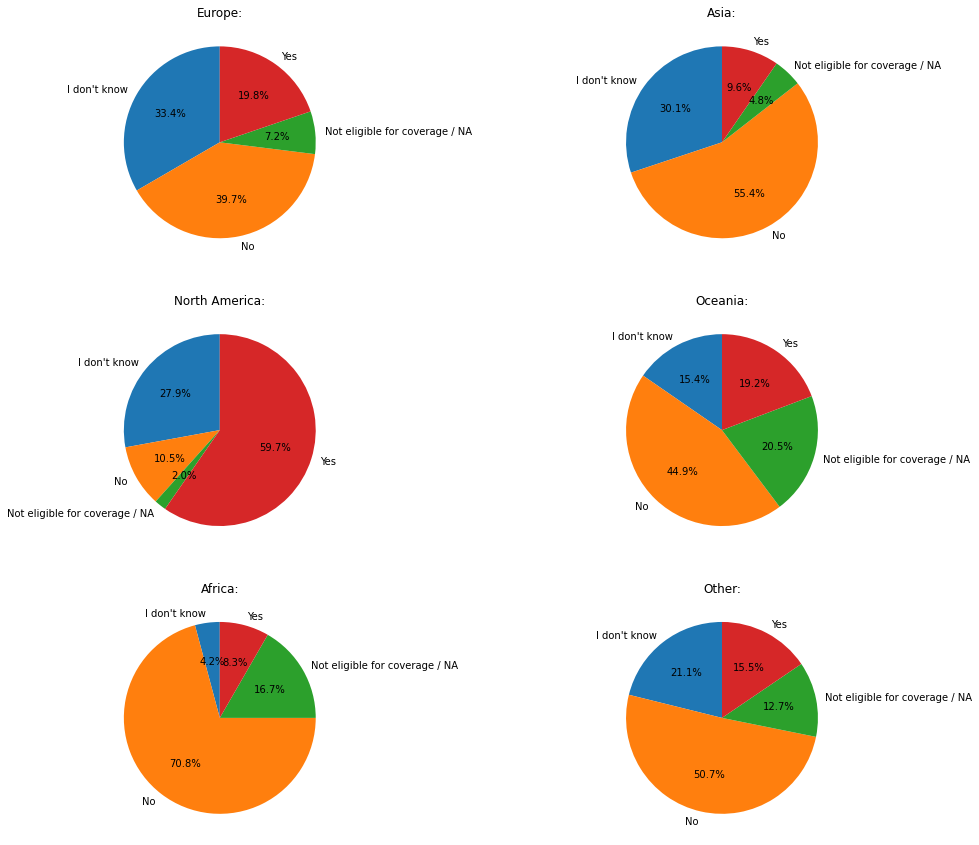

In [515]:
num_rows = 3
num_cols = 2

# Create subplots within a single figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

axes = axes.flatten()

# Iterate through each continent and plot a pie chart in the corresponding subplot
for i, continent in enumerate(continents):
    continent_data = result[result['Group'] == continent]
    
    total_counts = continent_data.iloc[:, [2,3,5,6]].sum(axis=0)
    
    # Plot a pie chart in the current subplot
    axes[i].pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{continent}:')

#plt.suptitle('Does your employer provide mental health benefits as part of healthcare coverage?', fontsize=18)
plt.subplots_adjust(hspace=0.2, wspace=0.5)
plt.show()


## QuestionID 99 -Would you be willing to discuss a mental health issue with your coworkers?

In [516]:
coWorker_discuss = df[df['QuestionID'] == 99]['AnswerText'].unique()
print(coWorker_discuss)

['Some of them' 'No' 'Yes']


In [517]:
# Filter the DataFrame for QuestionID 10
df_question_99 = df[df['QuestionID'] == 99]

# Merge the two DataFrames on UserID
merged_df = pd.merge(df_question_50, df_question_99[['UserID', 'AnswerText']], on='UserID', how='inner', suffixes=('_q50', '_q99'))

# Group by Year and Group, then count unique users and responses for QuestionID 10
result = merged_df.groupby(['Year', 'Group', 'AnswerText_q99'])['UserID'].nunique().unstack(fill_value=0).reset_index()
result

AnswerText_q99,Year,Group,No,Some of them,Yes
0,2014,Africa,1,6,2
1,2014,Asia,7,15,1
2,2014,Europe,71,211,78
3,2014,North America,169,522,135
4,2014,Oceania,9,16,5
5,2014,Other,3,5,4


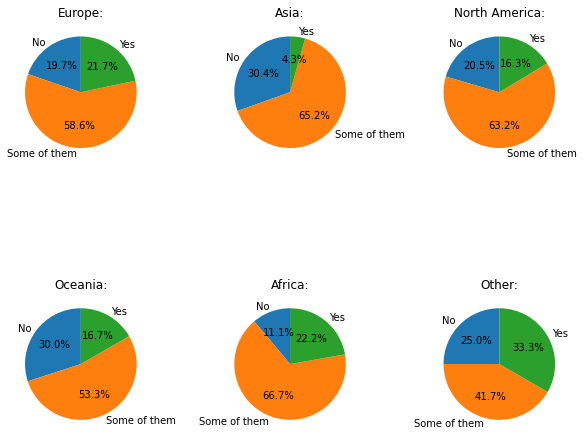

In [518]:
num_rows = 2
num_cols = 3

# Create subplots within a single figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,10))

axes = axes.flatten()

# Iterate through each continent and plot a pie chart in the corresponding subplot
for i, continent in enumerate(continents):
    continent_data = result[result['Group'] == continent]
    
    total_counts = continent_data.iloc[:, 2:].sum(axis=0)
    
    # Plot a pie chart in the current subplot
    axes[i].pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{continent}:')

#plt.suptitle('Would you be willing to discuss a mental health issue with your coworkers?', fontsize=18)
plt.subplots_adjust(hspace=0, wspace=0.5)
plt.show()


## QuestionID 100 - Would you be willing to discuss a mental health issue with your direct supervisor(s)

In [519]:
supervisor_discuss = df[df['QuestionID'] == 100]['AnswerText'].unique()
print(supervisor_discuss)

['Yes' 'No' 'Some of them']


In [520]:
df_question_100 = df[df['QuestionID'] == 100]

# Merge the two DataFrames on UserID
merged_df = pd.merge(df_question_50, df_question_100[['UserID', 'AnswerText']], on='UserID', how='inner', suffixes=('_q50', '_q100'))

# Group by Year and Group, then count unique users and responses for QuestionID 10
result = merged_df.groupby(['Year', 'Group', 'AnswerText_q100'])['UserID'].nunique().unstack(fill_value=0).reset_index()
result

AnswerText_q100,Year,Group,No,Some of them,Yes
0,2014,Africa,1,2,6
1,2014,Asia,11,4,8
2,2014,Europe,110,103,147
3,2014,North America,258,233,335
4,2014,Oceania,11,5,14
5,2014,Other,3,3,6


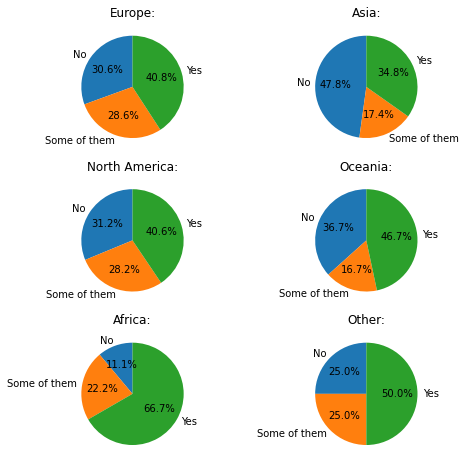

In [521]:
num_rows = 3
num_cols = 2

# Create subplots within a single figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

axes = axes.flatten()

# Iterate through each continent and plot a pie chart in the corresponding subplot
for i, continent in enumerate(continents):
    continent_data = result[result['Group'] == continent]
    
    total_counts = continent_data.iloc[:, 2:].sum(axis=0)
    
    # Plot a pie chart in the current subplot
    axes[i].pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{continent}:')

#plt.suptitle('Would you be willing to discuss a mental health issue with your direct supervisor(s)?', fontsize=18)
plt.subplots_adjust(hspace=0.2, wspace=0.1)
plt.show()


## QuestionID 58 - Have you ever discussed your mental health with your employer?

In [522]:
discuss = df[df['QuestionID'] == 58]['AnswerText'].unique()
print('Before: ',discuss)
df.loc[df['QuestionID'] == 58, 'AnswerText'] = df.loc[df['QuestionID'] == 58, 'AnswerText'].replace({'0': 'No', '1': 'Yes'})
discuss = df[df['QuestionID'] == 58]['AnswerText'].unique()
print('After: ',discuss)

Before:  ['0' '1' 'No Response']
After:  ['No' 'Yes' 'No Response']


In [523]:
#

#df_question_58 = df[df['QuestionID'] == 58]['AnswerText'].replace({'0':'No','1':'Yes'})

df_question_58 = df[df['QuestionID'] == 58]

# Merge the two DataFrames on UserID
merged_df = pd.merge(df_question_50, df_question_58[['UserID', 'AnswerText']], on='UserID', how='inner', suffixes=('_q50', '_q58'))

# Group by Year and Group, then count unique users and responses for QuestionID 10
result = merged_df.groupby(['Year', 'Group', 'AnswerText_q58'])['UserID'].nunique().unstack(fill_value=0).reset_index()
result

AnswerText_q58,Year,Group,No,No Response,Yes
0,2017,Africa,2,1,2
1,2017,Asia,13,6,2
2,2017,Europe,81,35,41
3,2017,North America,322,58,152
4,2017,Oceania,6,5,5
5,2017,Other,13,8,4
6,2018,Africa,3,1,1
7,2018,Asia,8,1,1
8,2018,Europe,39,16,8
9,2018,North America,189,34,102


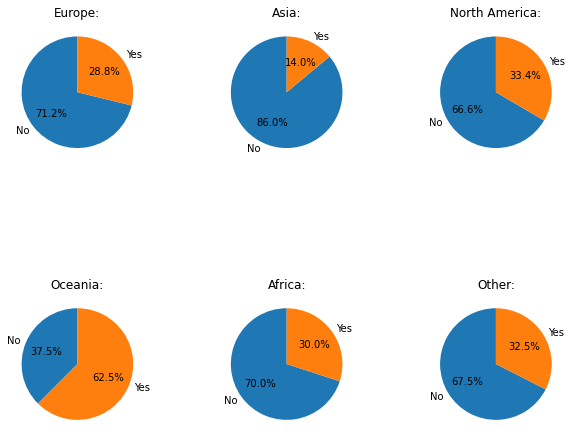

In [524]:
num_rows = 2
num_cols = 3

# Create subplots within a single figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

axes = axes.flatten()

# Iterate through each continent and plot a pie chart in the corresponding subplot
for i, continent in enumerate(continents):
    continent_data = result[result['Group'] == continent]
    
    total_counts = continent_data.iloc[:, [2,4]].sum(axis=0)
    
    # Plot a pie chart in the current subplot
    axes[i].pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{continent}:')

#plt.suptitle('Have you ever discussed your mental health with your employer?', fontsize=18)
plt.subplots_adjust(hspace=0, wspace=0.5)
plt.show()
    
    

## QuestionID 60 - Have you ever discussed your mental health with coworkers?

In [525]:
#discuss = df[df['QuestionID'] == 60]['AnswerText'].unique()
#print(discuss)

discuss = df[df['QuestionID'] == 60]['AnswerText'].unique()
print('Before: ',discuss)
df.loc[df['QuestionID'] == 60, 'AnswerText'] = df.loc[df['QuestionID'] == 60, 'AnswerText'].replace({'0': 'No', '1': 'Yes'})
discuss = df[df['QuestionID'] == 60]['AnswerText'].unique()
print('After: ',discuss)

Before:  ['1' 'No Response' '0']
After:  ['Yes' 'No Response' 'No']


In [526]:
df_question_60 = df[df['QuestionID'] == 60]

# Merge the two DataFrames on UserID
merged_df = pd.merge(df_question_50, df_question_60[['UserID', 'AnswerText']], on='UserID', how='inner', suffixes=('_q50', '_q60'))

# Group by Year and Group, then count unique users and responses for QuestionID 10
result = merged_df.groupby(['Year', 'Group', 'AnswerText_q60'])['UserID'].nunique().unstack(fill_value=0).reset_index()
result

AnswerText_q60,Year,Group,No,No Response,Yes
0,2017,Africa,1,1,3
1,2017,Asia,11,6,4
2,2017,Europe,70,35,52
3,2017,North America,256,58,218
4,2017,Oceania,4,5,7
5,2017,Other,11,8,6
6,2018,Africa,3,1,1
7,2018,Asia,8,1,1
8,2018,Europe,34,16,13
9,2018,North America,162,35,128


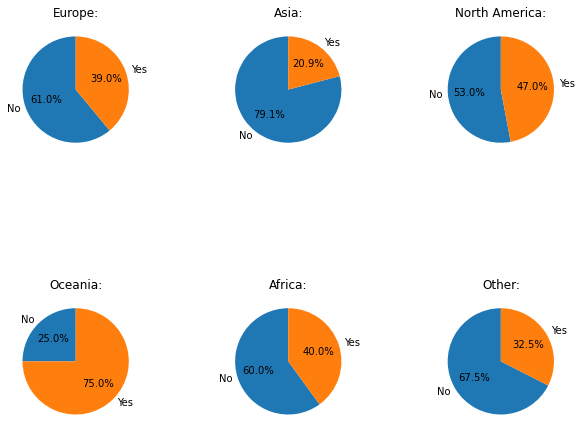

In [527]:
num_rows = 2
num_cols = 3

# Create subplots within a single figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

axes = axes.flatten()

# Iterate through each continent and plot a pie chart in the corresponding subplot
for i, continent in enumerate(continents):
    continent_data = result[result['Group'] == continent]
    
    total_counts = continent_data.iloc[:, [2,4]].sum(axis=0)
    
    # Plot a pie chart in the current subplot
    axes[i].pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{continent}:')

#plt.suptitle('Have you ever discussed your mental health with coworkers?', fontsize=18)
plt.subplots_adjust(hspace=0, wspace=0.6)
plt.show()

## QuestionID 98 -Do you think that discussing a mental health issue with your employer would have negative consequences?

In [528]:
discuss = df[df['QuestionID'] == 98]['AnswerText'].unique()
print(discuss)

['No' 'Maybe' 'Yes']


In [529]:
df_question_98 = df[df['QuestionID'] == 98]

# Merge the two DataFrames on UserID
merged_df = pd.merge(df_question_50, df_question_98[['UserID', 'AnswerText']], on='UserID', how='inner', suffixes=('_q50', '_q98'))

# Group by Year and Group, then count unique users and responses for QuestionID 10
result = merged_df.groupby(['Year', 'Group', 'AnswerText_q98'])['UserID'].nunique().unstack(fill_value=0).reset_index()
result

AnswerText_q98,Year,Group,Maybe,No,Yes
0,2014,Africa,3,3,3
1,2014,Asia,9,5,9
2,2014,Europe,131,150,79
3,2014,North America,326,313,187
4,2014,Oceania,4,13,13
5,2014,Other,4,6,2


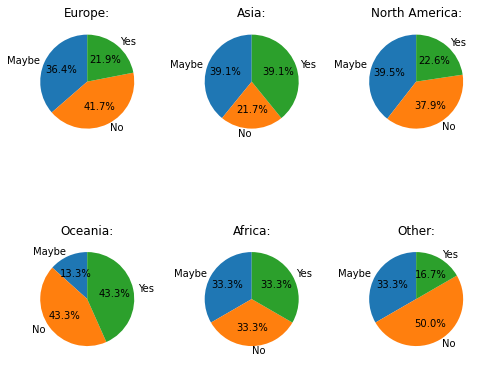

In [530]:
num_rows = 2
num_cols = 3

# Create subplots within a single figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

axes = axes.flatten()

# Iterate through each continent and plot a pie chart in the corresponding subplot
for i, continent in enumerate(continents):
    continent_data = result[result['Group'] == continent]
    
    total_counts = continent_data.iloc[:, 2:].sum(axis=0)
    
    # Plot a pie chart in the current subplot
    axes[i].pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{continent}:')

#plt.suptitle('Do you think that discussing a mental health issue with your employer would have negative consequences?', fontsize=18)
plt.subplots_adjust(hspace=0, wspace=0.4)
plt.show()

## QuestionID 62 - Have you ever had a coworker discuss their or another coworker's mental health with you?

In [531]:
discuss = df[df['QuestionID'] == 62]['AnswerText'].unique()
print(discuss)

['1' '0' 'No Response']


In [532]:
df_question_62 = df[df['QuestionID'] == 62]

# Merge the two DataFrames on UserID
merged_df = pd.merge(df_question_50, df_question_62[['UserID', 'AnswerText']], on='UserID', how='inner', suffixes=('_q50', '_q62'))

# Group by Year and Group, then count unique users and responses for QuestionID 10
result = merged_df.groupby(['Year', 'Group', 'AnswerText_q62'])['UserID'].nunique().unstack(fill_value=0).reset_index()
result

AnswerText_q62,Year,Group,0,1,No Response
0,2017,Africa,2,1,2
1,2017,Asia,7,8,6
2,2017,Europe,64,57,36
3,2017,North America,237,234,61
4,2017,Oceania,4,7,5
5,2017,Other,11,6,8
6,2018,Africa,2,2,1
7,2018,Asia,8,1,1
8,2018,Europe,26,21,16
9,2018,North America,147,143,35


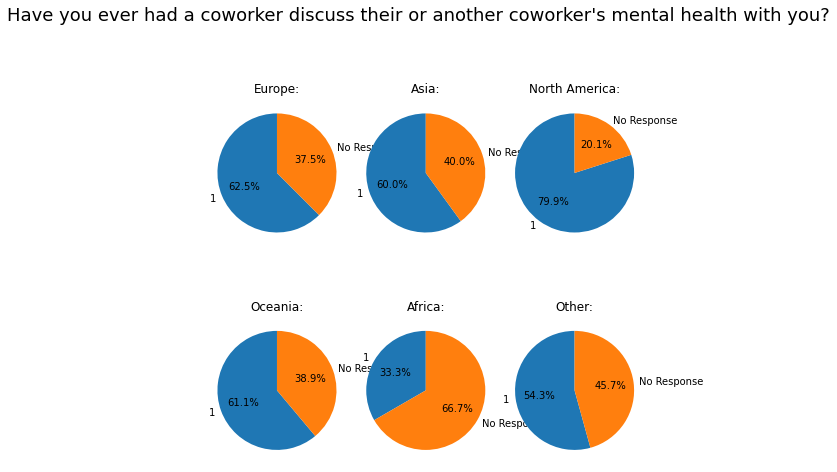

In [533]:
num_rows = 2
num_cols = 3

# Create subplots within a single figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

axes = axes.flatten()

# Iterate through each continent and plot a pie chart in the corresponding subplot
for i, continent in enumerate(continents):
    continent_data = result[result['Group'] == continent]
    
    total_counts = continent_data.iloc[:, 3:].sum(axis=0)
    
    # Plot a pie chart in the current subplot
    axes[i].pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{continent}:')

plt.suptitle('Have you ever had a coworker discuss their or another coworker\'s mental health with you?', fontsize=18)
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()    

## QuestionID 109- Do you think that discussing a physical health issue with previous employers would have negative consequences?

In [534]:
discuss = df[df['QuestionID'] == 109]['AnswerText'].unique()
print(discuss)

['None of them' 'Some of them' 'Yes, all of them' 'No Response']


In [535]:
df_question_109 = df[df['QuestionID'] == 109]

# Merge the two DataFrames on UserID
merged_df = pd.merge(df_question_50, df_question_109[['UserID', 'AnswerText']], on='UserID', how='inner', suffixes=('_q50', '_q109'))

# Group by Year and Group, then count unique users and responses for QuestionID 10
result = merged_df.groupby(['Year', 'Group', 'AnswerText_q109'])['UserID'].nunique().unstack(fill_value=0).reset_index()
result

AnswerText_q109,Year,Group,No Response,None of them,Some of them,"Yes, all of them"
0,2016,Africa,1,2,3,0
1,2016,Asia,6,4,11,2
2,2016,Europe,61,168,167,12
3,2016,North America,96,361,417,53
4,2016,Oceania,3,16,21,3
5,2016,Other,2,8,12,4


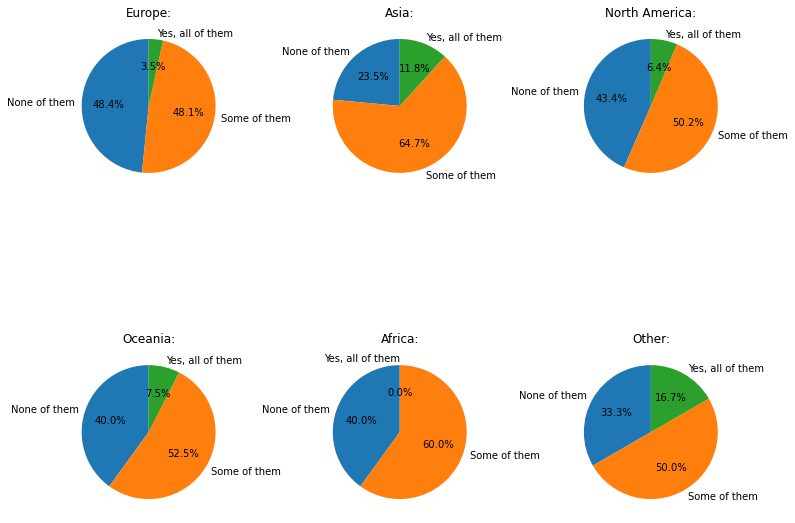

In [536]:
num_rows = 2
num_cols = 3

# Create subplots within a single figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,12))

axes = axes.flatten()

# Iterate through each continent and plot a pie chart in the corresponding subplot
for i, continent in enumerate(continents):
    continent_data = result[result['Group'] == continent]
    
    total_counts = continent_data.iloc[:, 3:].sum(axis=0)
    
    # Plot a pie chart in the current subplot
    axes[i].pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{continent}:')

#plt.suptitle('Do you think that discussing a physical health issue with previous employers would have negative consequences?', fontsize=16)
plt.subplots_adjust(hspace=0, wspace=0.5)
plt.show()    

## QuestionID 108 - Do you think that discussing a mental health disorder with previous employers would have negative consequences?

In [537]:
discuss = df[df['QuestionID'] == 108]['AnswerText'].unique()
print(discuss)

['Some of them' 'None of them' "I don't know" 'Yes, all of them'
 'No Response']


In [538]:
df_question_108 = df[df['QuestionID'] == 108]

# Merge the two DataFrames on UserID
merged_df = pd.merge(df_question_50, df_question_108[['UserID', 'AnswerText']], on='UserID', how='inner', suffixes=('_q50', '_q108'))

# Group by Year and Group, then count unique users and responses for QuestionID 10
result = merged_df.groupby(['Year', 'Group', 'AnswerText_q108'])['UserID'].nunique().unstack(fill_value=0).reset_index()
result

AnswerText_q108,Year,Group,I don't know,No Response,None of them,Some of them,"Yes, all of them"
0,2016,Africa,0,1,1,2,2
1,2016,Asia,4,6,3,6,4
2,2016,Europe,101,61,35,160,51
3,2016,North America,196,96,67,412,156
4,2016,Oceania,3,3,5,24,8
5,2016,Other,6,2,2,11,5


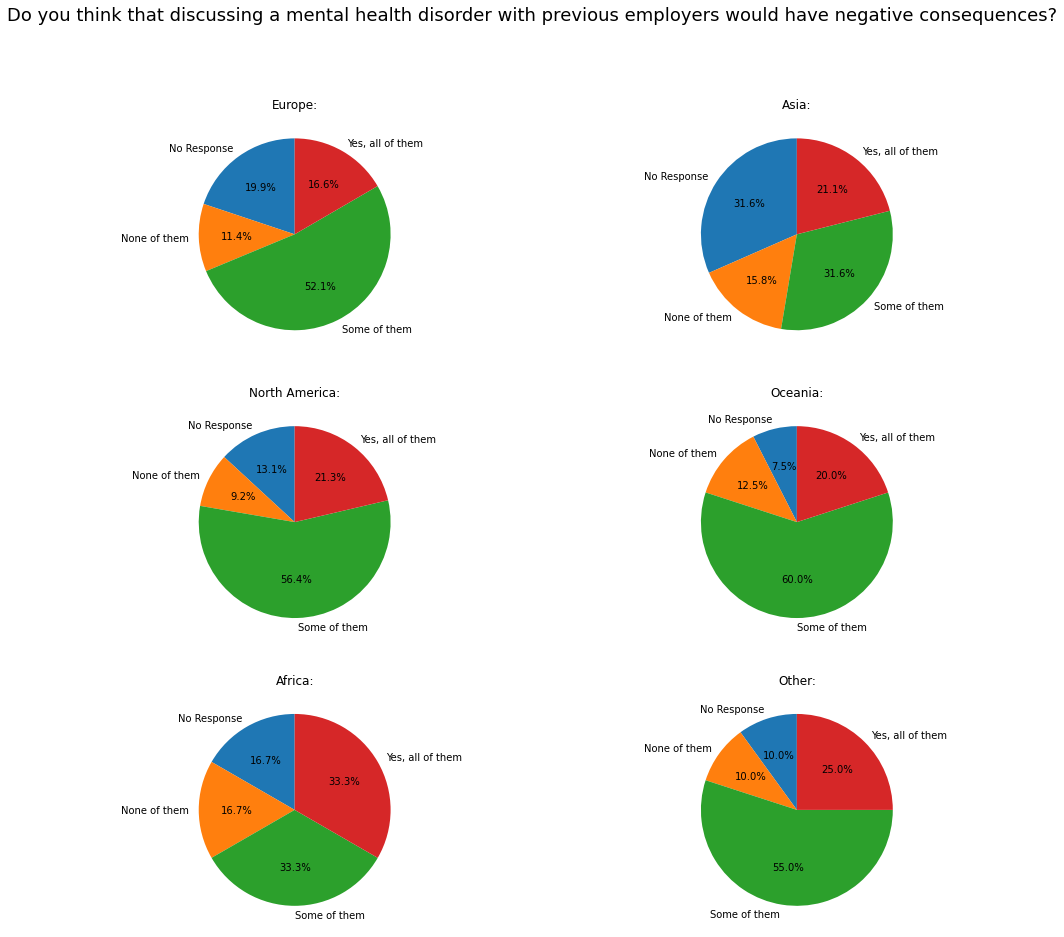

In [539]:
num_rows = 3
num_cols = 2

# Create subplots within a single figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

axes = axes.flatten()

# Iterate through each continent and plot a pie chart in the corresponding subplot
for i, continent in enumerate(continents):
    continent_data = result[result['Group'] == continent]
    
    total_counts = continent_data.iloc[:, 3:].sum(axis=0)
    
    # Plot a pie chart in the current subplot
    axes[i].pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{continent}:')

plt.suptitle('Do you think that discussing a mental health disorder with previous employers would have negative consequences?', fontsize=18)
plt.subplots_adjust(hspace=0.2, wspace=0.5)
plt.show()    

## 113 - Do you feel that being identified as a person with a mental health issue would hurt your career?

In [540]:
discuss = df[df['QuestionID'] == 113]['AnswerText'].unique()
print(discuss)

['Maybe' "No, I don't think it would" 'Yes, I think it would'
 'No, it has not' 'Yes, it has']


In [541]:
df_question_113 = df[df['QuestionID'] == 113]

# Merge the two DataFrames on UserID
merged_df = pd.merge(df_question_50, df_question_113[['UserID', 'AnswerText']], on='UserID', how='inner', suffixes=('_q50', '_q113'))

# Group by Year and Group, then count unique users and responses for QuestionID 10
result = merged_df.groupby(['Year', 'Group', 'AnswerText_q113'])['UserID'].nunique().unstack(fill_value=0).reset_index()
result

AnswerText_q113,Year,Group,Maybe,"No, I don't think it would","No, it has not","Yes, I think it would","Yes, it has"
0,2016,Africa,2,1,0,2,1
1,2016,Asia,7,3,1,10,2
2,2016,Europe,176,48,7,150,27
3,2016,North America,376,89,21,378,63
4,2016,Oceania,17,4,1,15,6
5,2016,Other,10,2,0,8,6


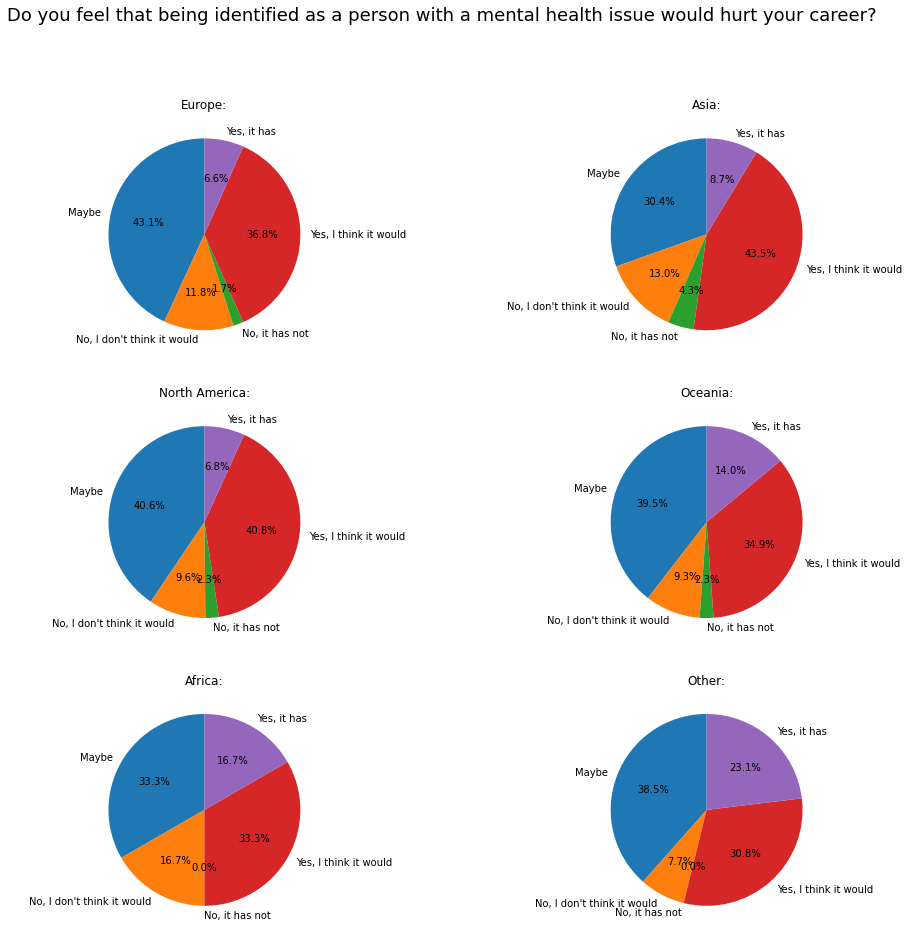

In [542]:
num_rows = 3
num_cols = 2

# Create subplots within a single figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

axes = axes.flatten()

# Iterate through each continent and plot a pie chart in the corresponding subplot
for i, continent in enumerate(continents):
    continent_data = result[result['Group'] == continent]
    
    total_counts = continent_data.iloc[:, 2:].sum(axis=0)
    
    # Plot a pie chart in the current subplot
    axes[i].pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{continent}:')

plt.suptitle('Do you feel that being identified as a person with a mental health issue would hurt your career?', fontsize=18)
plt.subplots_adjust(hspace=0.2, wspace=0.5)
plt.show()    

## 114	Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?

## 115	If yes, what condition(s) have you been diagnosed with?

In [543]:
counts = df[df['QuestionID'] == 115]['AnswerText'].value_counts()
print(counts)


#-1 = 865
#Mood Disorder (Depression, Bipolar Disorder, etc) = 412
#Anxiety Disorder (Generalized, Social, Phobia, etc) = 345
# ADHD = 121
# everything else is < 100

No Response                                                                                                                                                  865
Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                            412
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                          345
Attention Deficit Hyperactivity Disorder                                                                                                                     121
Post-traumatic Stress Disorder                                                                                                                                69
Obsessive-Compulsive Disorder                                                                                                                                 45
Substance Use Disorder            

In [544]:
# Define the groups
anxiety = ['Anxiety Disorder (Generalized, Social, Phobia, etc)']
mood = ['Mood Disorder (Depression, Bipolar Disorder, etc)']
adhd = ['Attention Deficit Hyperactivity Disorder']
nothing = ['No Response']
g = anxiety+mood+adhd+nothing

#df[df['QuestionID'] == 115 &(df['AnswerText'] not in d)]
df.loc[(df['QuestionID'] == 115) & ~(df['AnswerText'].isin(g)), 'AnswerText'] = 'other'

In [545]:
df_question_115 = df[df['QuestionID'] == 115]

# Merge the two DataFrames on UserID
merged_df = pd.merge(df_question_50, df_question_115[['UserID', 'AnswerText']], on='UserID', how='inner', suffixes=('_q50', '_q115'))

# Group by Year and Group, then count unique users and responses for QuestionID 10
result = merged_df.groupby(['Year', 'Group', 'AnswerText_q115'])['UserID'].nunique().unstack(fill_value=0).reset_index()
result

AnswerText_q115,Year,Group,"Anxiety Disorder (Generalized, Social, Phobia, etc)",Attention Deficit Hyperactivity Disorder,"Mood Disorder (Depression, Bipolar Disorder, etc)",No Response,other
0,2016,Africa,1,0,2,4,0
1,2016,Asia,3,1,5,18,2
2,2016,Europe,73,9,82,285,57
3,2016,North America,252,109,305,513,146
4,2016,Oceania,13,1,15,24,9
5,2016,Other,3,1,3,21,2


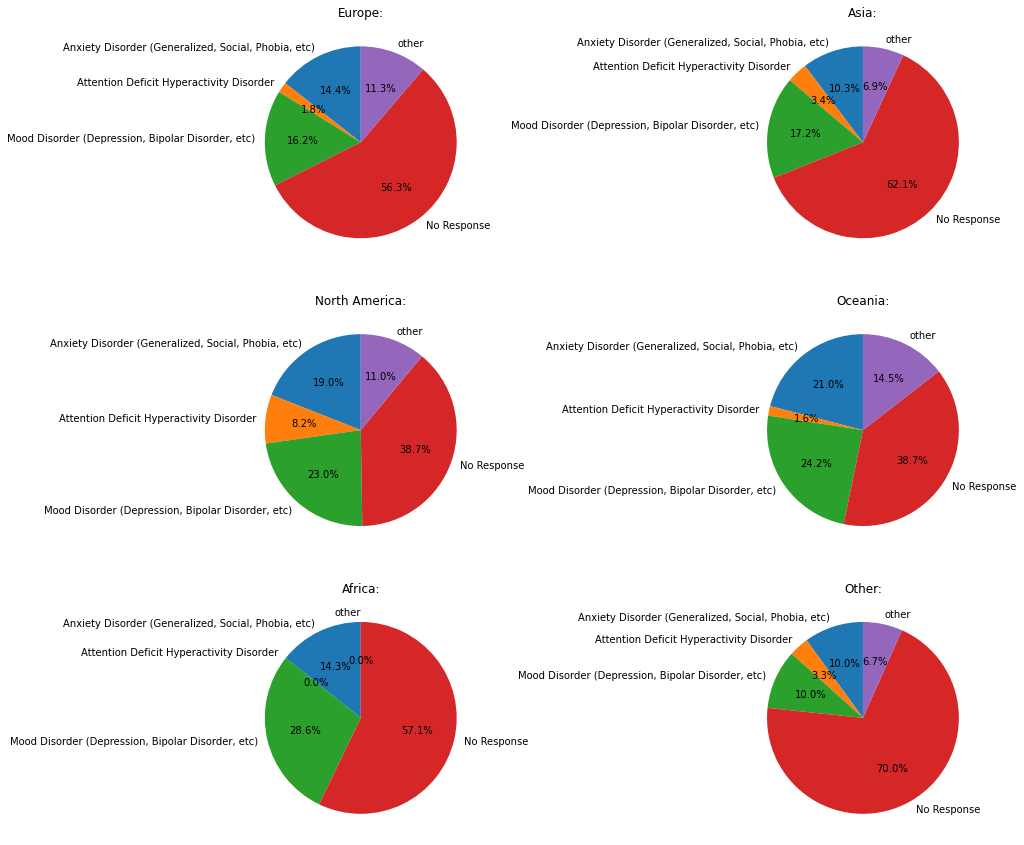

In [546]:
num_rows = 3
num_cols = 2

# Create subplots within a single figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

axes = axes.flatten()

# Iterate through each continent and plot a pie chart in the corresponding subplot
for i, continent in enumerate(continents):
    continent_data = result[result['Group'] == continent]
    
    total_counts = continent_data.iloc[:, 2:].sum(axis=0)
    
    # Plot a pie chart in the current subplot
    axes[i].pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{continent}:')

#plt.suptitle('what condition(s) have you been diagnosed with?', fontsize=18)
plt.subplots_adjust(hspace=0.2, wspace=0.5)
plt.show()    

## 85 - Overall, how well do you think the tech industry supports employees with mental health issues?

In [547]:
counts = df[df['QuestionID'] == 85]['AnswerText'].value_counts()
print(counts)

3              597
2              494
1              217
4              191
5               24
No Response      2
Name: AnswerText, dtype: int64


In [548]:
df_question_85= df[df['QuestionID'] == 85]

# Merge the two DataFrames on UserID
merged_df = pd.merge(df_question_50, df_question_85[['UserID', 'AnswerText']], on='UserID', how='inner', suffixes=('_q50', '_q85'))

# Group by Year and Group, then count unique users and responses for QuestionID 10
result = merged_df.groupby(['Year', 'Group', 'AnswerText_q85'])['UserID'].nunique().unstack(fill_value=0).reset_index()
result

AnswerText_q85,Year,Group,1,2,3,4,5,No Response
0,2017,Africa,2,1,2,0,0,0
1,2017,Asia,5,5,7,0,4,0
2,2017,Europe,21,60,56,17,3,0
3,2017,North America,68,178,218,64,4,0
4,2017,Oceania,3,4,6,3,0,0
5,2017,Other,3,7,11,2,0,2
6,2018,Africa,1,3,1,0,0,0
7,2018,Asia,4,1,2,2,1,0
8,2018,Europe,13,16,24,10,0,0
9,2018,North America,46,108,124,43,4,0


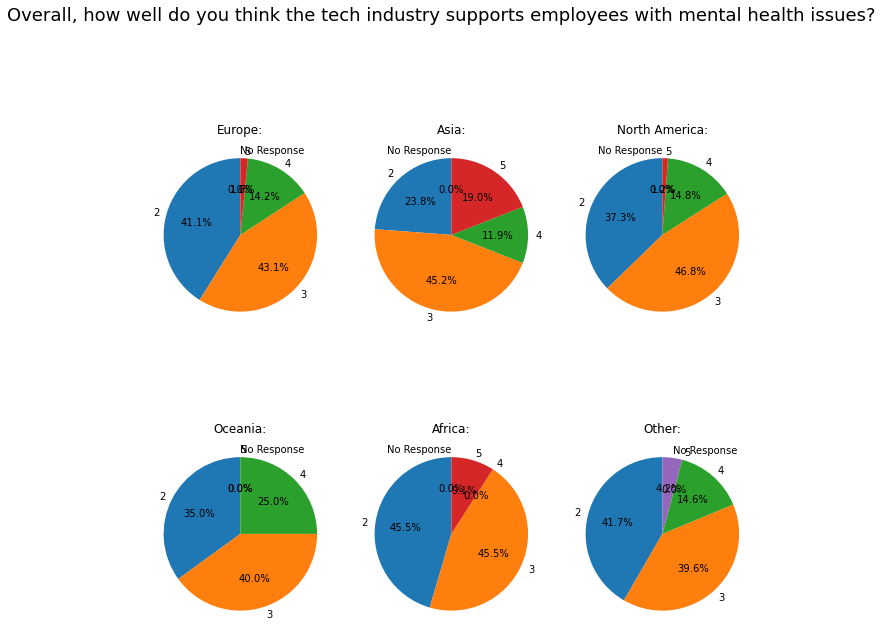

In [549]:
num_rows = 2
num_cols = 3

# Create subplots within a single figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 11))

axes = axes.flatten()

# Iterate through each continent and plot a pie chart in the corresponding subplot
for i, continent in enumerate(continents):
    continent_data = result[result['Group'] == continent]
    
    total_counts = continent_data.iloc[:, 3:].sum(axis=0)
    
    # Plot a pie chart in the current subplot
    axes[i].pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{continent}:')

plt.suptitle('Overall, how well do you think the tech industry supports employees with mental health issues?', fontsize=18)
plt.subplots_adjust(hspace=0, wspace=0.1)
plt.show()    